Plant Disease Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Plant_images"

'Corn_(maize)___Common_rust_'   Potato___Early_blight   Tomato___Bacterial_spot


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from tensorflow.keras.utils import img_to_array
from PIL import Image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense,BatchNormalization, GlobalAveragePooling2D
import cv2
import os
import random
from os import listdir

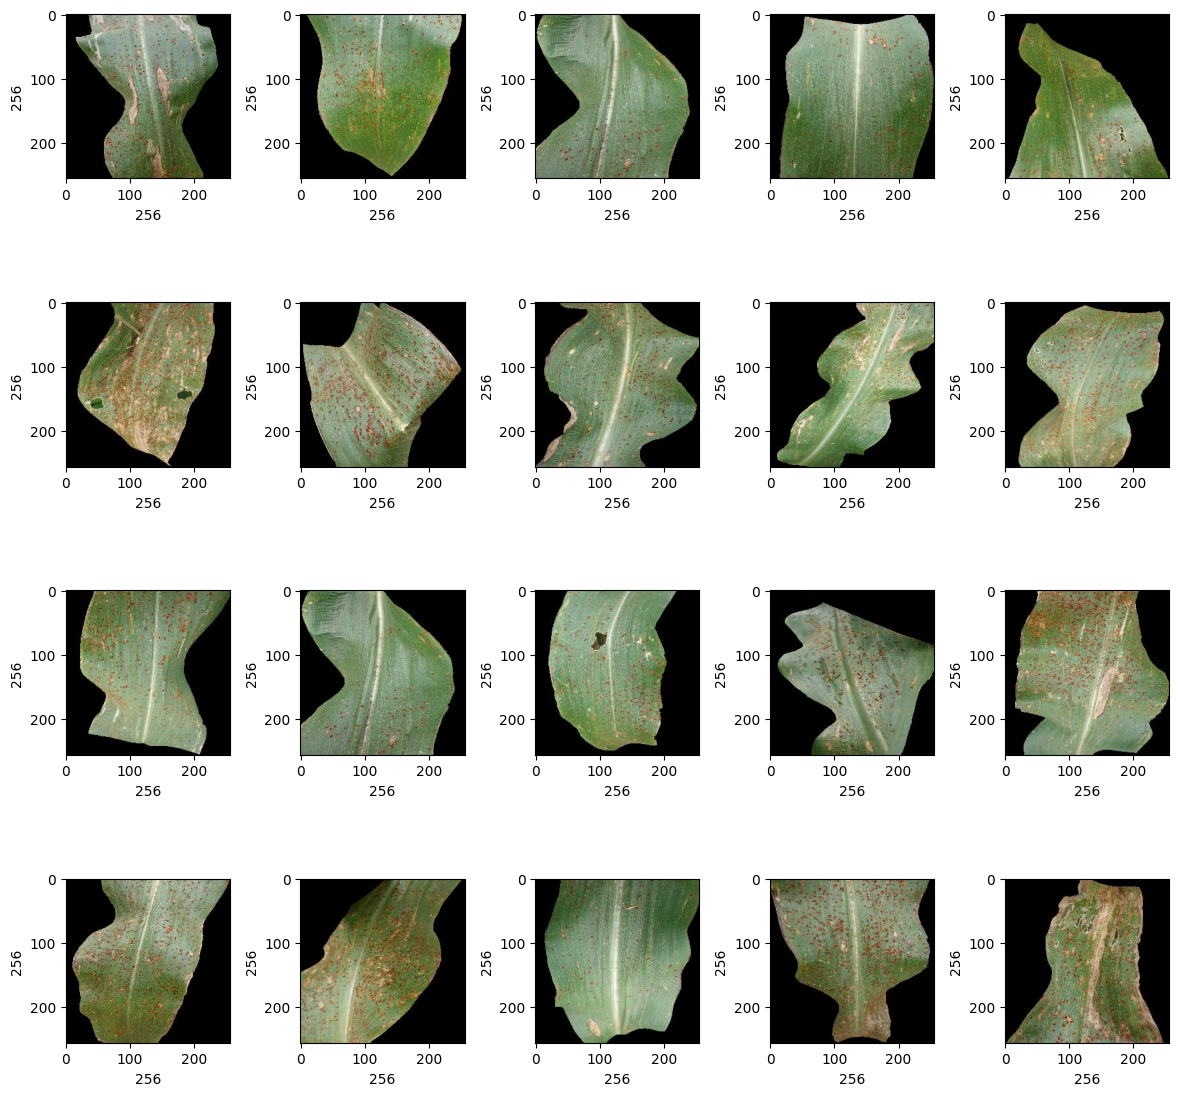

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Plant_images/Corn_(maize)___Common_rust_"
for i in range(1,21):
  plt.subplot(4,5,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [ ]:

def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None :
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
  except Exception as e:
    print(f"Error : {e}")
    return None

In [ ]:
dir="/content/drive/MyDrive/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

#reading and converting images to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_array = convert_image_to_array(image_path)
    image_list.append(image_array)
    label_list.append(binary_labels[temp])

In [ ]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
0,300
1,300
2,300


In [ ]:
image_list[0].shape

(256, 256, 3)

In [ ]:
label_list = np.array(label_list)
image_list = np.array(image_list)/255.0

In [ ]:
image_list.shape

(900, 256, 256, 3)

In [ ]:
image_list[0]

array([[[0.7372549 , 0.6862745 , 0.69411767],
        [0.7372549 , 0.6862745 , 0.69411767],
        [0.7372549 , 0.6862745 , 0.69411767],
        ...,
        [0.6745098 , 0.6117647 , 0.6156863 ],
        [0.6666667 , 0.6039216 , 0.60784316],
        [0.6431373 , 0.5803922 , 0.58431375]],

       [[0.7411765 , 0.6901961 , 0.69803923],
        [0.7372549 , 0.6862745 , 0.69411767],
        [0.73333335, 0.68235296, 0.6901961 ],
        ...,
        [0.6745098 , 0.6117647 , 0.6156863 ],
        [0.6666667 , 0.6039216 , 0.60784316],
        [0.64705884, 0.58431375, 0.5882353 ]],

       [[0.7411765 , 0.6901961 , 0.69803923],
        [0.7372549 , 0.6862745 , 0.69411767],
        [0.7294118 , 0.6784314 , 0.6862745 ],
        ...,
        [0.6745098 , 0.6117647 , 0.6156863 ],
        [0.6745098 , 0.6117647 , 0.6156863 ],
        [0.65882355, 0.59607846, 0.6       ]],

       ...,

       [[0.49411765, 0.46666667, 0.47843137],
        [0.49803922, 0.47058824, 0.48235294],
        [0.54509807, 0

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(image_list,label_list,test_size=0.2,random_state=2)
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)
print(len(x_train),len(x_test),len(y_train),len(y_test))

720 180 720 180


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │       4,194,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,763 (16.07 MB)

 Trainable params: 4,213,763 (16.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
epochs = 100
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.6603 - loss: 0.3379 - val_accuracy: 0.6216 - val_loss: 0.3509
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.6651 - loss: 0.3210 - val_accuracy: 0.6216 - val_loss: 0.3456
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.6554 - loss: 0.3177 - val_accuracy: 0.6216 - val_loss: 0.3280
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.6456 - loss: 0.3141 - val_accuracy: 0.6216 - val_loss: 0.3248
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.6493 - loss: 0.3033 - val_accuracy: 0.6486 - val_loss: 0.3116
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.6793 - loss: 0.2868 - val_accuracy: 0.6486 - val_loss: 0.3067
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.6822 - loss: 0.2732 - val_accuracy: 0.7297 - val_loss: 0.2945
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.7567 - loss: 0.2745 - val_accuracy: 0.7432 - v

In [ ]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step


In [ ]:
model.evaluate(x_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 1.0000 - loss: 7.3171e-04


[0.0006823438452556729, 1.0]

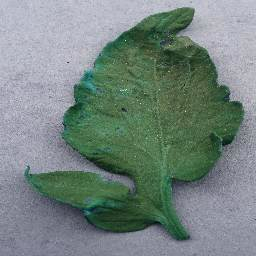

In [ ]:
img = array_to_img(x_test[0])
img

In [ ]:
model.predict(x_test[0].reshape(1,256,256,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step


array([[1.9487891e-04, 9.9980515e-01, 5.6318158e-29]], dtype=float32)

In [ ]:
class_disease = {0:'Corn_(maize)___Common_rust_',1: 'Potato___Early_blight' ,2:'Tomato___Bacterial_spot'}

In [ ]:
 pred_disease =[]
 for i in range(0,3):
    index= np.argmax(model.predict(x_test[i].reshape(1,256,256,3)), axis=1)
    pred_disease.append(class_disease[index[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
actual_disease = [class_disease[label] for label in np.argmax(y_test[0:3],axis=1)]

In [ ]:
print("Actual Disease : ",actual_disease)
print("Predicted Disease : ",pred_disease)

Actual Disease :  ['Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight']
Predicted Disease :  ['Potato___Early_blight', 'Potato___Early_blight', 'Potato___Early_blight']


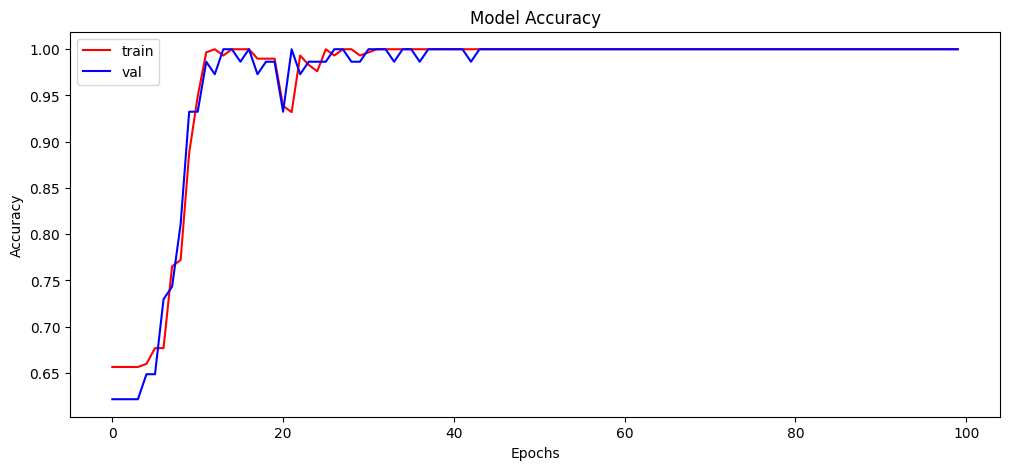

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Plant_images/plant_disease.h5')